<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/g12_s22847_p8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozbuduj sieć konwolucyjną z projektu 6 do autokodera, poprzez dodanie symetrycznych warstw *Conv2DTranspose*. Przystosuj sieć do wykorzystania danych mnist (Ręcznie pisane cyfry) oraz aby wyjście z encodera oraz wejście dekodera było 10 elementową tablicą, w której jedna wartość jest równa 1 a pozostałe 0.

INFORMACJA: Jest to projekt dla chętnych, którzy potrzebują punktów.

Opisz w komentarzach dokładnie swoje kroki i spostrzeżenia. Tak jak poprzednio, udostępnij swoją pracę (link do notebooka) dla kowalto@pjwstk.edu.pl

Termin jak zwykle: do następnych zajęć Waszej grupy.

UWAGA: Z szacunku dla czasu tych, którzy zdobyli już wystarczającą ilość punktów, "obronę" tego projektu przeprowadzimy zdalnie. (Teams, po indywidualnym uzgodnieniu) Zajęć "stacjonarnych" we czwartek wyjątkowo nie będzie, a pozostałe osoby zapraszam już do szkicowania swojego projektu w PROLOGU.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


7


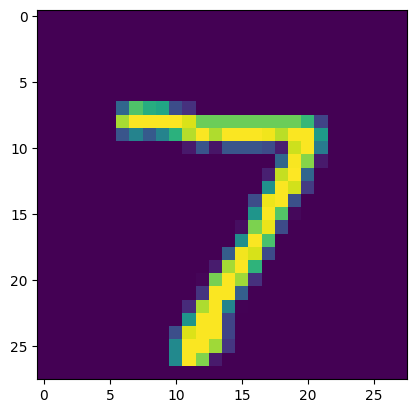

2


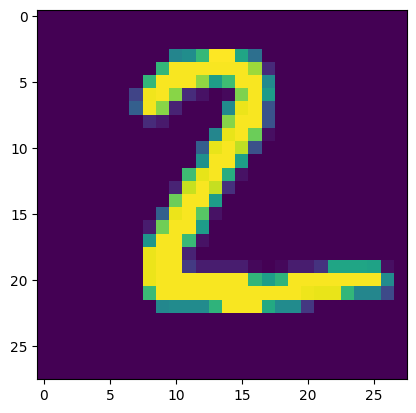

1


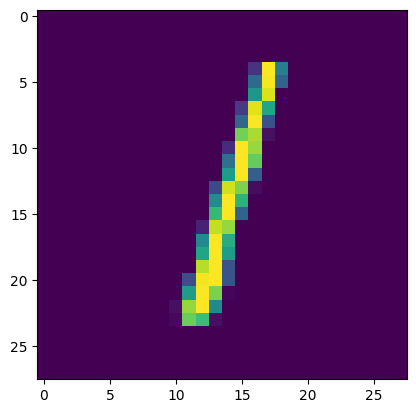

0


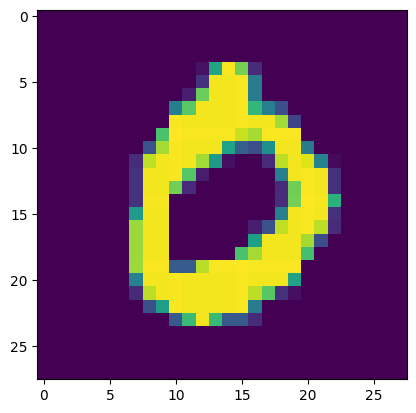

4


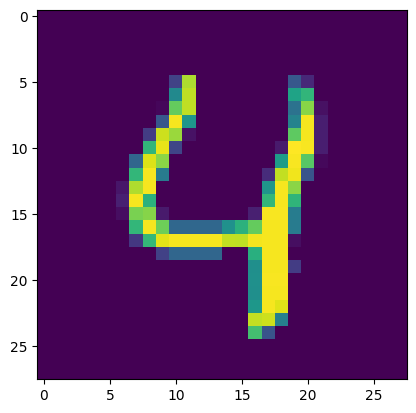

1


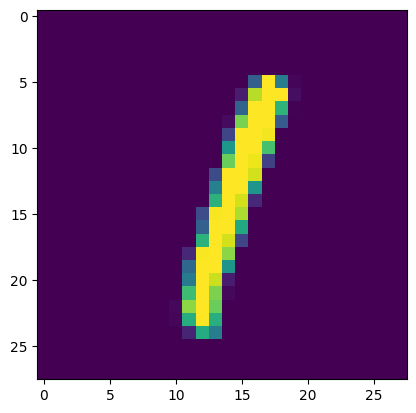

4


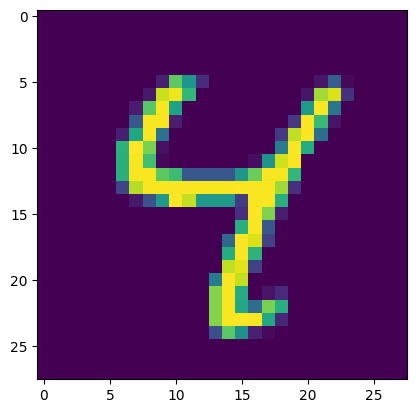

9


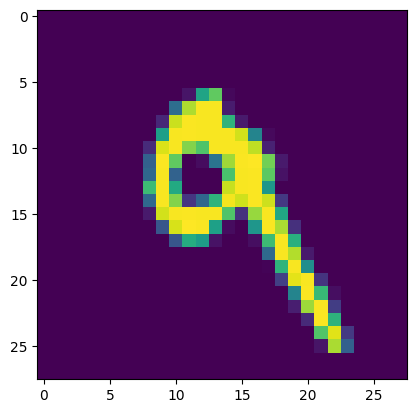

5


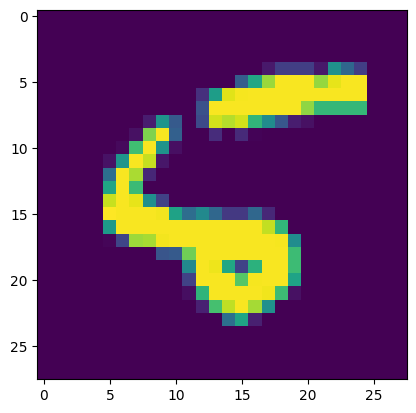

9


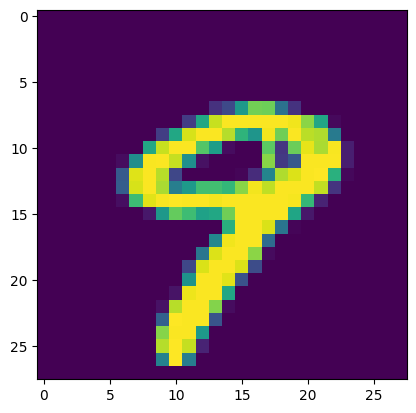

0


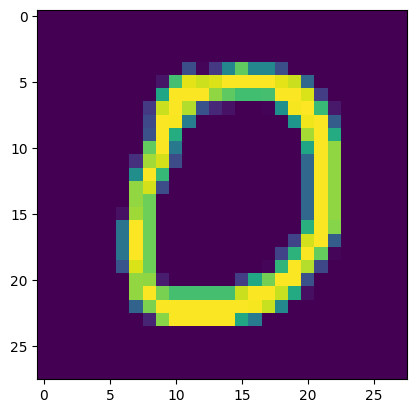

6


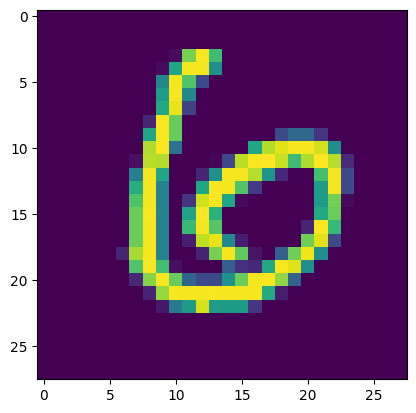

9


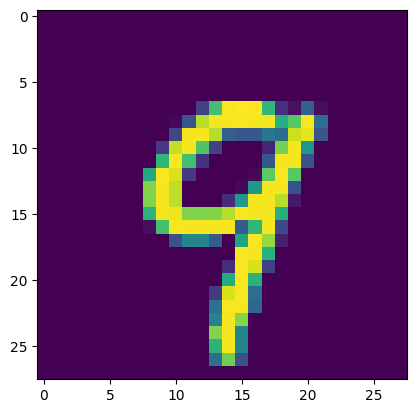

0


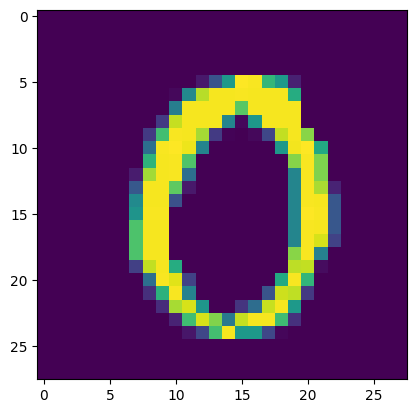

1


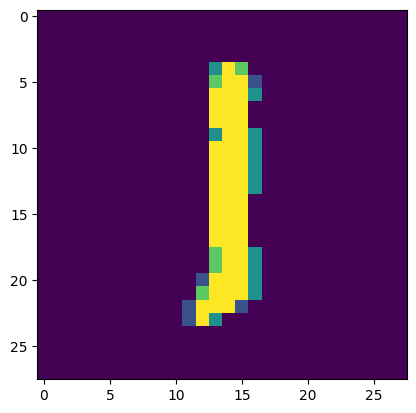

5


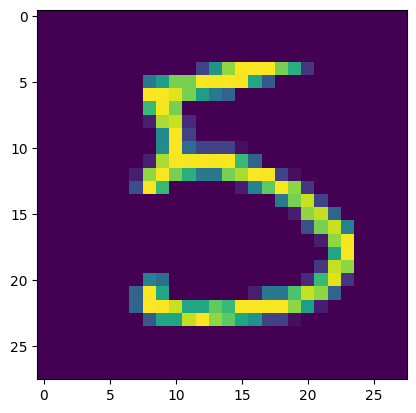

9


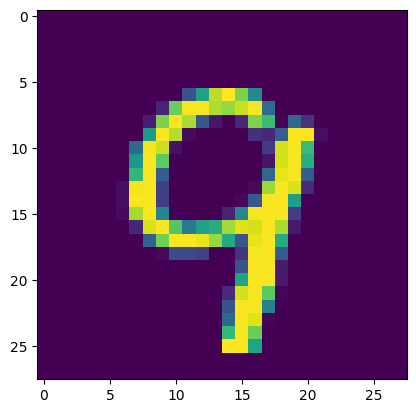

7


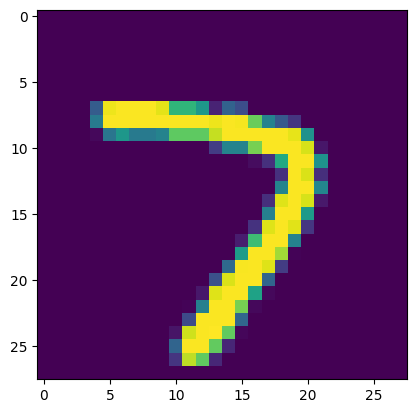

3


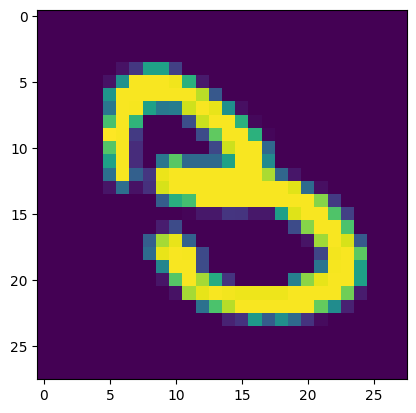

4


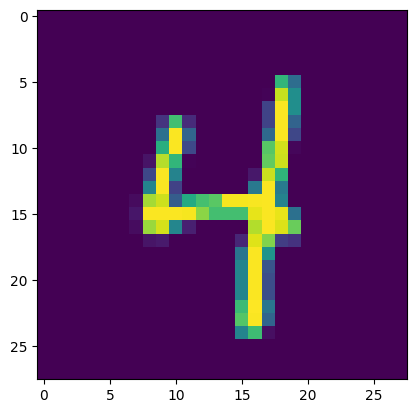

In [ ]:
for i in range(20):
    print(y_test[i])
    plt.imshow(x_test[i])
    plt.show()

## Przykład autoencodera

In [ ]:
from keras.layers import Input, Dense
from tensorflow.keras import Model, utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train)
print(y_train)

[[5.5 4.2 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [6.4 3.2 5.3 2.3]
 [6.7 3.3 5.7 2.1]
 [5.  3.2 1.2 0.2]
 [6.7 3.1 5.6 2.4]
 [7.6 3.  6.6 2.1]
 [5.8 4.  1.2 0.2]
 [7.2 3.  5.8 1.6]
 [6.6 2.9 4.6 1.3]
 [5.  2.3 3.3 1. ]
 [5.2 2.7 3.9 1.4]
 [4.7 3.2 1.3 0.2]
 [6.1 2.8 4.7 1.2]
 [5.5 2.5 4.  1.3]
 [5.8 2.7 5.1 1.9]
 [4.8 3.4 1.9 0.2]
 [5.  2.  3.5 1. ]
 [5.8 2.7 3.9 1.2]
 [4.7 3.2 1.6 0.2]
 [6.2 2.8 4.8 1.8]
 [7.7 2.6 6.9 2.3]
 [6.4 3.2 4.5 1.5]
 [5.7 2.8 4.5 1.3]
 [5.5 2.4 3.8 1.1]
 [6.3 3.4 5.6 2.4]
 [6.1 2.9 4.7 1.4]
 [6.1 2.6 5.6 1.4]
 [6.5 3.  5.8 2.2]
 [5.8 2.8 5.1 2.4]
 [5.7 2.8 4.1 1.3]
 [5.1 3.7 1.5 0.4]
 [7.7 3.8 6.7 2.2]
 [6.3 2.5 5.  1.9]
 [6.  3.  4.8 1.8]
 [6.4 2.8 5.6 2.1]
 [5.9 3.  4.2 1.5]
 [7.7 2.8 6.7 2. ]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.6 0.2]
 [6.3 2.7 4.9 1.8]
 [5.2 3.4 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [5.1 3.8 1.9 0.4]
 [4.6 3.6 1.  0.2]
 [6.3 2.5 4.9 1.5]
 [4.9 3.1 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.5 3.  5.5 1.8]
 [6.7 3.1 4.7 1.5]
 [5.7 3.8 1.7 0.3]
 [5.7 2.6 3.5 1. ]
 [5.8 2.7 4.

In [ ]:
inputs = Input(4)
encoded_1 = Dense(5, activation='relu')(inputs)
encoded = Dense(3, activation='relu')(encoded_1)
decoded_1 = Dense(3, activation='relu')(encoded)
decoded_2 = Dense(7, activation='relu')(decoded_1)
decoded = Dense(4)(decoded_2)

auto_encoder = Model(inputs, decoded)
auto_encoder.compile(loss='mean_squared_error', optimizer='adam')
auto_encoder.summary()
utils.plot_model(auto_encoder, show_shapes=True, dpi=100)

auto_encoder.fit(X_train, X_train, epochs=200)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 7)                 28        
                                                                 
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params:

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


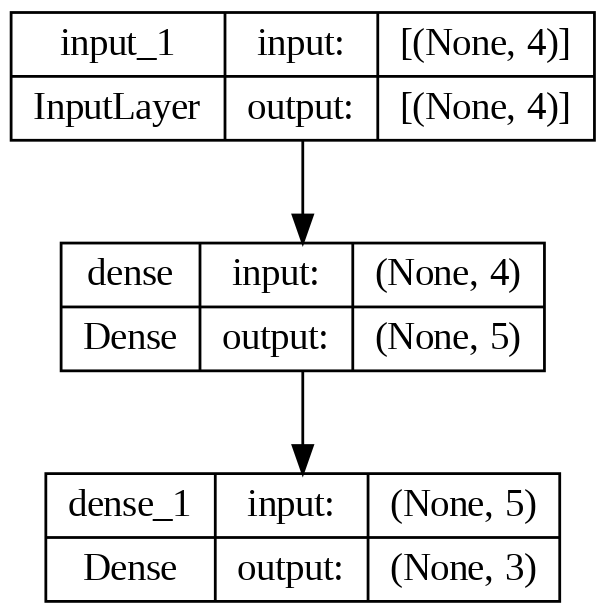

In [ ]:
encoder = Model(inputs, encoded)
encoder.summary()
utils.plot_model(encoder, show_shapes=True, dpi=200)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 28        
                                                                 
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


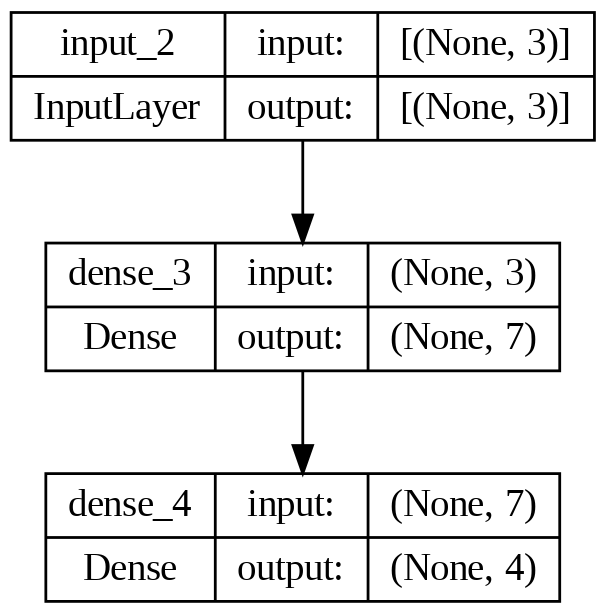

In [ ]:
decoder = Model(decoded_1, decoded)
decoder.summary()
utils.plot_model(decoder, show_shapes=True, dpi=200)

In [ ]:
for i in range(45):
    print(X_test[i])
    print(y_test[i])
    o = encoder.predict(X_test)
    print(o[i])
    print(decoder.predict(o)[i])
    print('----------------')

[6.2 3.4 5.4 2.3]
2
2/2 [==============================] - 0s 4ms/step
[0. 0. 0.]
2/2 [==============================] - 0s 4ms/step
[0.7753487  0.7517969  0.75778437 0.659671  ]
----------------
[5.4 3.9 1.7 0.4]
0
2/2 [==============================] - 0s 4ms/step
[0. 0. 0.]
2/2 [==============================] - 0s 3ms/step
[0.7753487  0.7517969  0.75778437 0.659671  ]
----------------
[4.6 3.4 1.4 0.3]
0
2/2 [==============================] - 0s 3ms/step
[0. 0. 0.]
2/2 [==============================] - 0s 3ms/step
[0.7753487  0.7517969  0.75778437 0.659671  ]
----------------
[4.9 2.5 4.5 1.7]
2
2/2 [==============================] - 0s 5ms/step
[0. 0. 0.]
2/2 [==============================] - 0s 4ms/step
[0.7753487  0.7517969  0.75778437 0.659671  ]
----------------
[6.6 3.  4.4 1.4]
1
2/2 [==============================] - 0s 3ms/step
[0. 0. 0.]
2/2 [==============================] - 0s 5ms/step
[0.7753487  0.7517969  0.75778437 0.659671  ]
----------------
[6.1 2.8 4.  1.3]
1


# Wytrenuj model używając jedynie danych wejściowych, wyjście modelu równa się jego wejściu.

# Zaprezentuj na danych testowych jak wyglądają dane wejściowe, dane zwrócone przez encoder i dane wyjściowe.

313/313 [==============================] - 2s 6ms/step


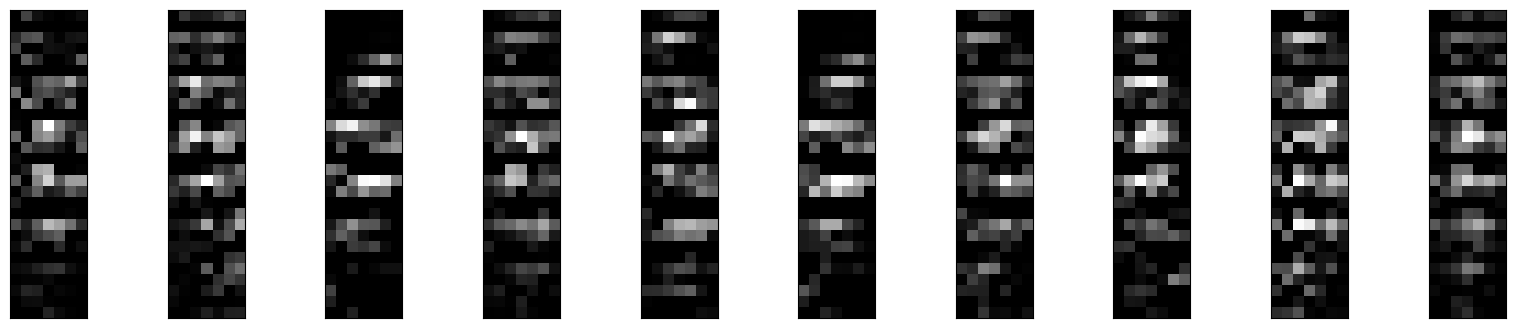

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib as plt 

import tensorflow as tf
from tensorflow import keras

from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, KMeans
from sklearn.metrics.cluster import davies_bouldin_score

def create_model(input_shape):
    #autokoder stosowy
    model = models.Sequential()
    #warswa konwolucyjna, okno konwolucyjne rozmiar 3/3
    model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    #zmniejszamy rozmiar warstwy 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    #wewnetrzny kod => warstwa kodujaca
    model.add(layers.Conv2D(4, (3, 3), padding='same', activation='relu'))

    #zwiekszanie rozmiaru ( sumetrycznie do zmniejszania )
    #4 ostatnie warstwy to dekodowanie
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(16, (3, 3), padding='same', activation='relu'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

#zczytywanie danych
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
#normalizacja stopni szarosci
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
#nromalizacja
test_images = test_images.astype('float32') / 255

model = create_model(input_shape=(28, 28, 1))
model.compile(optimizer='adam', loss='binary_crossentropy')
# wejscie i wysjcie jest takie samo
model.fit(train_images, train_images, epochs = 3, batch_size=64)
#po nauczeniu modelu 
model.save_weights('wagi')

# Odziel model encodera i sprawdź co oznaczają parametry wyjściowe. Czy obrazy zostały sklasyfikowane zgodnie z tym co pokazują?


# =======TUTAJ ROZWIAZANIE==========

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib as plt 

import tensorflow as tf
from tensorflow import keras

from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, KMeans
from sklearn.metrics.cluster import davies_bouldin_score

In [ ]:
def create_model(input_shape):
    #autokoder stosowy
    model = models.Sequential()
    #warswa konwolucyjna, okno konwolucyjne rozmiar 3/3
    model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    #zmniejszamy rozmiar warstwy 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    #wewnetrzny kod => warstwa kodujaca
    model.add(layers.Conv2D(4, (3, 3), padding='same', activation='relu'))

    #zwiekszanie rozmiaru ( sumetrycznie do zmniejszania )
    #4 ostatnie warstwy to dekodowanie
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(8, (3, 3), padding='same', activation='relu'))
    model.add(layers.UpSampling2D((2,2)))
    model.add(layers.Conv2DTranspose(16, (3, 3), padding='same', activation='relu'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
#wczytywanie danych
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
#normalizacja stopni szarosci
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
#nromalizacja
test_images = test_images.astype('float32') / 255

##Trenowanie modelu tylko na danych wejsciowych

In [ ]:
model = create_model(input_shape=(28, 28, 1))
model.compile(optimizer='adam', loss='binary_crossentropy')
#======trenowanie modelu tylko na danych wejsciowcyh
# wejscie i wysjcie jest takie samo
model.fit(train_images, train_images, epochs = 3, batch_size=64)
#po nauczeniu modelu 
model.save_weights('wagi')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 4)           292       
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 14, 4)       

In [ ]:
#model 1 przeksztalca obraz na wewnetrza reprezentacje 
model1 = create_model(input_shape=(28, 28, 1))
model1.load_weights('wagi')
model1.pop()
model1.pop()
model1.pop()
model1.pop()
model1.summary()

wynik1 = model1.predict(train_images)

print(wynik1.shape)
print('wynik1 = {}'.format(wynik1.shape))
#a = liczba probek 
a,b,c,d = wynik1.shape
#b*c*d wektor płaski - kod wewnetrzy 
kod = wynik1.reshape(a,b*c*d)
print('kod = {}'.format(kod.shape))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 4)           292       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 14, 14, 4)       

##Zaprezentuj na danych testowych jak wyglądają dane wejściowe, dane zwrócone przez encoder i dane wyjściowe. - wyswietlenie bo jednym przykladowym rekordzie

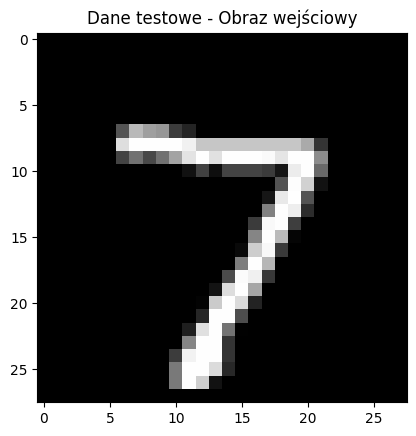

1/1 [==============================] - 0s 121ms/step


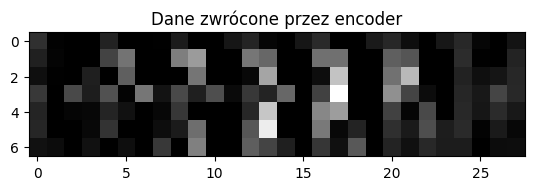

1/1 [==============================] - 0s 55ms/step


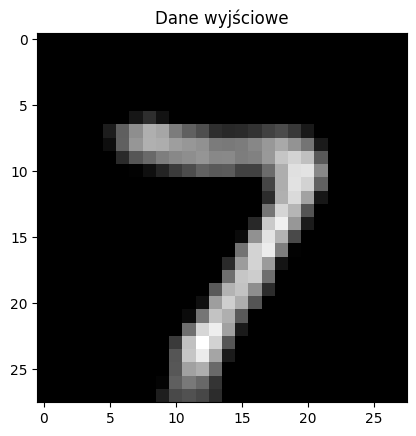

In [ ]:
import matplotlib.pyplot as plt

# Wyświetlanie danych testowych
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title("Dane testowe - Obraz wejściowy")
plt.show()

# Wyświetlanie danych zwróconych przez encoder
plt.figure()
wynik1 = model1.predict(test_images[0].reshape(1, 28, 28, 1))
plt.imshow(wynik1.reshape(7, 7 * 4), cmap='gray')
plt.title("Dane zwrócone przez encoder")
plt.show()

# Wyświetlanie danych wyjściowych
plt.figure()
wynik2 = model.predict(test_images[0].reshape(1, 28, 28, 1))
wynik2_img = np.squeeze(wynik2)  # Usunięcie zbędnych wymiarów, uzyskujemy jednowymiarową tablicę zawierającą dane wyjściowe
plt.imshow(wynik2[0, :, :, 0], cmap='gray') # tylko peirwszy obraz
plt.title("Dane wyjściowe")
plt.show()


## Sprawdzenie 

In [ ]:
kmeans = KMeans(n_clusters=10,random_state = 0).fit(kod)
kmeans.fit_predict(kod)

#srodki ciezkosci klas - reprezentacja klasy 
centrum0 = kmeans.cluster_centers_[0]
centrum1 = kmeans.cluster_centers_[1]
centrum2 = kmeans.cluster_centers_[2]
centrum3 = kmeans.cluster_centers_[3]
centrum4 = kmeans.cluster_centers_[4]
centrum5 = kmeans.cluster_centers_[5]
centrum6 = kmeans.cluster_centers_[6]
centrum7 = kmeans.cluster_centers_[7]
centrum8 = kmeans.cluster_centers_[8]
centrum9 = kmeans.cluster_centers_[9]

#a - numer probki , b - dlugosc kodu
(a,b) = kod.shape

Y = np.zeros(train_labels.shape)

#odleglsoci wszystych probek do srodkow ciezkosci
for i in range(a):
  odl0 = np.linalg.norm(kod[i,:]-centrum0)
  odl1 = np.linalg.norm(kod[i,:]-centrum1)
  odl2 = np.linalg.norm(kod[i,:]-centrum2)
  odl3 = np.linalg.norm(kod[i,:]-centrum3)
  odl4 = np.linalg.norm(kod[i,:]-centrum4)
  odl5 = np.linalg.norm(kod[i,:]-centrum5)
  odl6 = np.linalg.norm(kod[i,:]-centrum6)
  odl7 = np.linalg.norm(kod[i,:]-centrum7)
  odl8 = np.linalg.norm(kod[i,:]-centrum8)
  odl9 = np.linalg.norm(kod[i,:]-centrum9)

  #automatyczne etykietowanie
  if(odl0) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=0
  if(odl1) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=1
  if(odl2) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=2
  if(odl3) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=3
  if(odl4) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=4
  if(odl5) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=5
  if(odl6) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=6
  if(odl7) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=7
  if(odl8) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=8
  if(odl9) == min(odl0,odl1,odl2,odl3,odl4,odl5,odl6,odl7,odl8,odl9):
    Y[i]=9
print('nasze etykiety')
print(Y) #nasze etykiety
print('etykiety prawdziwe')
print(train_labels) #gotowe etykiety

z = 7

print('etykiety ktore powinny byc 7')
print(train_labels[Y==z])

#dla dla kazdej liczby ktora jest 7 sprawdzam jakie inne liczby przypisal nasz model i sumuje je
print('===========================')
print('0: ',sum(train_labels[Y==z]==0))
print('1: ',sum(train_labels[Y==z]==1)/1)
print('2: ',sum(train_labels[Y==z]==2)/2)
print('3: ',sum(train_labels[Y==z]==3)/3)
print('4: ',sum(train_labels[Y==z]==4)/4)
print('5: ',sum(train_labels[Y==z]==5)/5)
print('6: ',sum(train_labels[Y==z]==6)/6)
print('7: ',sum(train_labels[Y==z]==7)/7)
print('8: ',sum(train_labels[Y==z]==8)/8)
print('9: ',sum(train_labels[Y==z]==9)/9)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


nasze etykiety
[9. 4. 7. ... 9. 1. 3.]
etykiety prawdziwe
[5 0 4 ... 5 6 8]
etykiety ktore powinny byc 7
[4 4 7 ... 2 9 9]
0:  18
1:  10.0
2:  104.5
3:  31.333333333333332
4:  601.5
5:  31.4
6:  11.166666666666666
7:  74.85714285714286
8:  10.625
9:  189.44444444444446


##Obliczenie dokladnosci dla kazdej liczby - slabe wyniki moga wynikac z tego ze ustawilam tylko 3 epoki

In [ ]:
for z in range(10):
      accuracy = sum(train_labels[Y == z] == z) / len(train_labels[Y == z])
      print("Dokładność dla etykiety {}: {:.2%}".format(z, accuracy))


Dokładność dla etykiety 0: 0.09%
Dokładność dla etykiety 1: 0.43%
Dokładność dla etykiety 2: 5.35%
Dokładność dla etykiety 3: 0.47%
Dokładność dla etykiety 4: 0.35%
Dokładność dla etykiety 5: 3.09%
Dokładność dla etykiety 6: 3.27%
Dokładność dla etykiety 7: 9.93%
Dokładność dla etykiety 8: 5.93%
Dokładność dla etykiety 9: 0.41%


obliczenie wszytkich zle sklasyfikowanych i wyswietlenie przykladowych 10 do pokazania

In [ ]:
import matplotlib.pyplot as plt

def display_misclassified_images(true_labels, predicted_labels):
    misclassified_indices = np.where(true_labels != predicted_labels)[0]
    misclassified_images = train_images[misclassified_indices]
    misclassified_true_labels = true_labels[misclassified_indices]
    misclassified_predicted_labels = predicted_labels[misclassified_indices]

    print("Liczba źle sklasyfikowanych obrazów: {}".format(len(misclassified_images)))

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title("True: {}, Predicted: {}".format(misclassified_true_labels[i],
                                                            misclassified_predicted_labels[i]))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


Liczba źle sklasyfikowanych obrazów: 58273


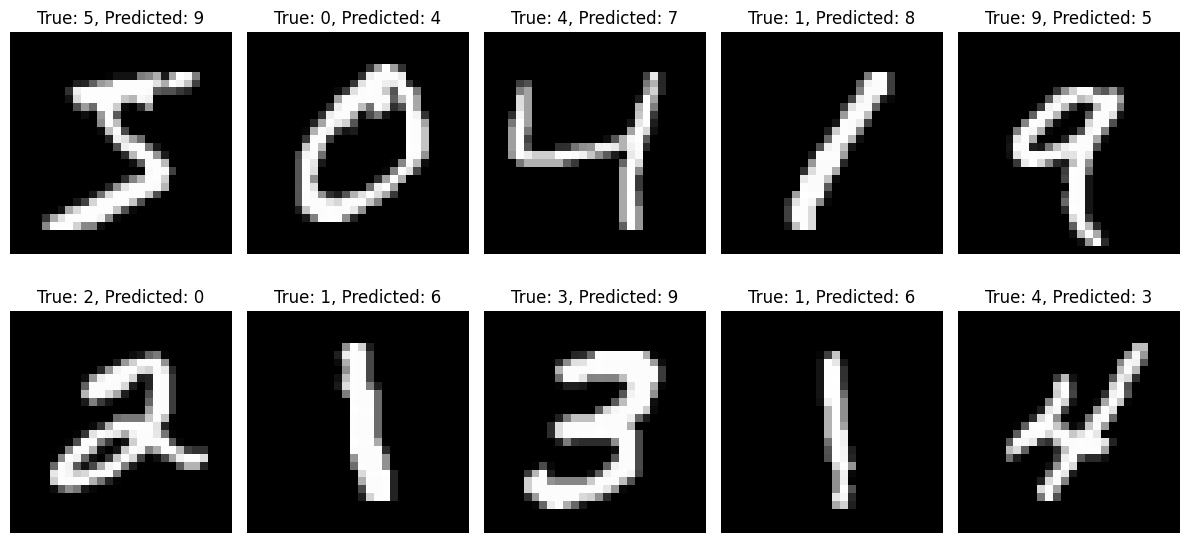

In [ ]:
predicted_labels = kmeans.predict(kod)
display_misclassified_images(train_labels, predicted_labels)
